
# Train

First I am going to import and load the housing train and test data. I'm going to append the training and testing data into the same dataframe for the cleaning so I can be sure that they will have the same dimensions when it's time to run models. 

In [53]:
import pandas as pd 
import numpy as np 
import csv 
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer

In [54]:
train_temp=pd.read_csv(r"C:\Users\owner\Documents\Junior\S2\Machine_Learning\HW2\train.csv")
test=pd.read_csv(r"C:\Users\owner\Documents\Junior\S2\Machine_Learning\HW2\test.csv")
ntrain = train_temp.shape[0]
ntest = test.shape[0]

In [55]:
all_data = pd.concat((train_temp, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


I am going to check the set for missing data and fill in missing data accordingly with what makes sense from the variable description.


In [57]:
df_missing=(all_data.isnull().sum()/len(all_data))
df_missing.sort_values(ascending=False).head(40)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageQual      0.054471
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Electrical      0.000343
Exterior2nd     0.000343
KitchenQual     0.000343
Exterior1st     0.000343
GarageCars      0.000343
TotalBsmtSF     0.000343
GarageArea      0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
SaleType        0.000343
Condition2      0.000000
FullBath        0.000000
2ndFlrSF        0.000000
3SsnPorch       0.000000
BedroomAbvGr    0.000000
BldgType        0.000000


From the above list it is clar that several variables have signifigant amounts of missing data. I will have to deal with this before using the data. 

From the data description, PoolQC is "pool quality." A NaN indicates that there is no pool. So it's not necessarily that pool quality just wasn't sampled, it's just that there aren't very many pools. So I feel comfortable filling in the missing data with 0. It's the same with MiscFeature, Alley, Fence, FireplaceQu, and all the garage/basement/masonry veneer information.

In [58]:
all_data['PoolQC'].fillna(0, inplace=True)
all_data['MiscFeature'].fillna(0, inplace=True)
all_data['Alley'].fillna(0, inplace=True)
all_data['Fence'].fillna(0, inplace=True)
all_data['FireplaceQu'].fillna(0, inplace=True)
all_data['GarageCond'].fillna(0, inplace=True)
all_data['GarageType'].fillna(0, inplace=True)
all_data['GarageQual'].fillna(0, inplace=True)
all_data['GarageFinish'].fillna(0, inplace=True)
all_data['GarageYrBlt'].fillna(0, inplace=True)
all_data['BsmtExposure'].fillna(0, inplace=True)
all_data['BsmtFinType2'].fillna(0, inplace=True)
all_data['BsmtQual'].fillna(0, inplace=True)
all_data['BsmtCond'].fillna(0, inplace=True)
all_data['BsmtFinType1'].fillna(0, inplace=True)
all_data['MasVnrArea'].fillna(0, inplace=True)
all_data['MasVnrType'].fillna(0, inplace=True)
all_data['BsmtHalfBath'].fillna(0, inplace=True)
all_data['BsmtFullBath'].fillna(0, inplace=True)
all_data['BsmtFinSF1'].fillna(0, inplace=True)
all_data['GarageCars'].fillna(0, inplace=True)
all_data['TotalBsmtSF'].fillna(0, inplace=True)
all_data['BsmtUnfSF'].fillna(0, inplace=True)
all_data['BsmtFinSF2'].fillna(0, inplace=True)
all_data['GarageArea'].fillna(0, inplace=True)
all_data.shape

(2919, 80)

The Kaggle Data Description says LotFrontage is the "linear feet of street connected to the property." This is probably does impact housing prices, so I want to be able to use it in my estimates. As shown below, there are no homes with "0" LotFrontage, but google searching indicates that there aren't very many homes that have "0" lot frontage, and certainly not 18%. So I can't fill missing values in with a 0 like I  did before. Plus, below it is shown that LotFrontage being listed as "NaN" has nothing to do with how close it is to the street or what type of street it is, so I have to assume that LotFrontage missing isn't indicating lack of frontage, just poor data.

In [59]:
all_data['LotFrontage'].sort_values().head()

1651    21.0
649     21.0
1007    21.0
2603    21.0
2601    21.0
Name: LotFrontage, dtype: float64

In [60]:
all_data['LotFrontage'].mean()

69.30579531442663

In [61]:
all_data[['LotFrontage','Condition1','Street']].head(20)

,LotFrontage,Condition1,Street
0,65.0,Norm,Pave
1,80.0,Feedr,Pave
2,68.0,Norm,Pave
3,60.0,Norm,Pave
4,84.0,Norm,Pave
5,85.0,Norm,Pave
6,75.0,Norm,Pave
7,NaN,PosN,Pave
8,51.0,Artery,Pave
9,50.0,Artery,Pave


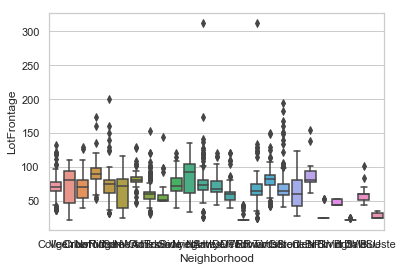

In [62]:
import seaborn as sns
sns.set(style="whitegrid")
testing_frontage=sns.boxplot(x="Neighborhood", y="LotFrontage", data=all_data)
testing_frontage

The above figure shows the spread of lot frontage by neighborhood. There's a few noticible neighborhoods where lotfrontage has pretty noticeable varience, but for the most part neighborhood seems to be a good indicator of lot frontage. So I will fill missing lot frontage with the average of its neighborhood. 

In [63]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Below I will MSSubClass, (which is a numerical variable), into a string. The reason for this is that the data description makes it clear that the number assignments are not cardinal or even ordinal in anyway, just a placeholder to differenciate between classes. Stringing it will make sure that my models don't take the number assignment as anything other than a tag. I also want to generate a total squarefoot variable, because even though it is just a linear combination of other variables in my set, total squarefoot is a very important measure in purchasing a home.

In [64]:
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)

In [65]:
all_data['total_sqrft']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [66]:
all_data=all_data.drop(['Id',], axis=1)

In [67]:
all_data.shape

(2919, 80)

In [68]:
all_data=pd.get_dummies(all_data)
all_data.shape

(2919, 319)

In [69]:
train_temp = all_data[:ntrain]
test = all_data[ntrain:]
print(test.shape, train_temp.shape) 

(1459, 319) (1460, 319)


Now that I am assured I will have the "test" data in the same shape as the train data, I will go back and clean the train data independently in the same way, and keep SalePrice, and remove outliers. 


In [70]:
train=pd.read_csv(r"C:\Users\owner\Documents\Junior\S2\Machine_Learning\HW2\train.csv")
train['PoolQC'].fillna(0, inplace=True)
train['MiscFeature'].fillna(0, inplace=True)
train['Alley'].fillna(0, inplace=True)
train['Fence'].fillna(0, inplace=True)
train['FireplaceQu'].fillna(0, inplace=True)
train['GarageCond'].fillna(0, inplace=True)
train['GarageType'].fillna(0, inplace=True)
train['GarageQual'].fillna(0, inplace=True)
train['GarageFinish'].fillna(0, inplace=True)
train['GarageYrBlt'].fillna(0, inplace=True)
train['BsmtExposure'].fillna(0, inplace=True)
train['BsmtFinType2'].fillna(0, inplace=True)
train['BsmtQual'].fillna(0, inplace=True)
train['BsmtCond'].fillna(0, inplace=True)
train['BsmtFinType1'].fillna(0, inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['MasVnrType'].fillna(0, inplace=True)
train['BsmtHalfBath'].fillna(0, inplace=True)
train['BsmtFullBath'].fillna(0, inplace=True)
train['BsmtFinSF1'].fillna(0, inplace=True)
train['GarageCars'].fillna(0, inplace=True)
train['TotalBsmtSF'].fillna(0, inplace=True)
train['BsmtUnfSF'].fillna(0, inplace=True)
train['BsmtFinSF2'].fillna(0, inplace=True)
train['GarageArea'].fillna(0, inplace=True)
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
train['MSSubClass']=train['MSSubClass'].apply(str)
train['total_sqrft']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train=train.drop(['Id',], axis=1)
train=pd.get_dummies(train)
train.shape

(1460, 319)

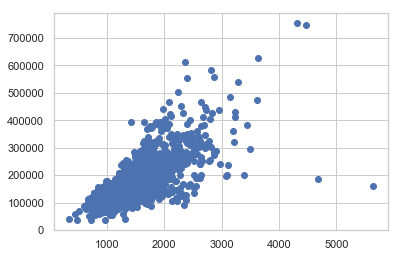

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])

There are some clear outliers which have a huge area, but suprisingly low price. I'm going to drop them out of the sample so they don't skew the estimates. 

In [72]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train.shape

(1458, 319)

### Linear and Polynomial Regressions

I'm first going to run a basic Linear Regression Model and Polynomial Model and just see where I currently am with my predictive power. I'm going to import the needed libraries and scale my data.

In [73]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()
scaler.fit(train)
scaled_df=scaler.transform(train)
scaled_df.shape

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


(1458, 319)

In [77]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01, max_iter=5000)
linear_regression_model.fit(scaled_df, train['SalePrice'])
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(train['SalePrice'], predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 10373442.721975977


As a benchmark, the linear regression with a tolerance of .0001, learning rate of .01 and max iterations set to 5000 does not have great predictive power because the RMSE is so large.

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly=PolynomialFeatures(2, include_bias=False)
poly_df=poly.fit_transform(train)
scaled_poly_df=scaler.fit_transform(poly_df) 

linear_regression_model = SGDRegressor(tol=.000001, eta0=.001, max_iter=20000)
linear_regression_model.fit(scaled_poly_df, train['SalePrice'])
predictions = linear_regression_model.predict(scaled_poly_df)
mse = mean_squared_error(train['SalePrice'], predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 2273675242707.147


I'm not happy with the size of my mean squared errors, so I'm going back to the data. Below it shows "SalePrice", my dependent variable, has a positive skew. I'm going to fix the skew with replacing the sale price with the log of sale price and run it again. 


 mu = 180932.92 and sigma = 79467.79



C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


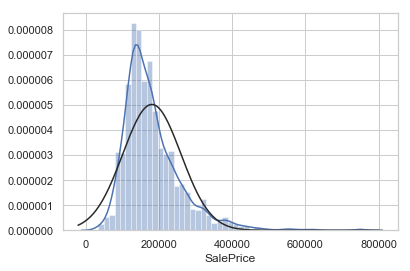

In [80]:
from scipy.stats import norm, skew
sns.distplot(train['SalePrice'], fit=norm); 
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


In [81]:
train['SalePrice']=np.log1p(train['SalePrice'])


 mu = 12.02 and sigma = 0.40



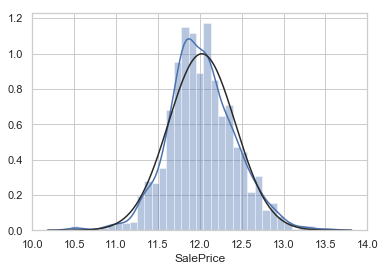

In [82]:
from scipy.stats import norm, skew
sns.distplot(train['SalePrice'], fit=norm); 
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


In [83]:
linear_regression_model=SGDRegressor(tol=.0000001, eta0=.001, max_iter=20000)
linear_regression_model.fit(scaled_df, train['SalePrice']) 
prediction=linear_regression_model.predict(scaled_df)
mse=mean_squared_error(train['SalePrice'], prediction)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.06383030799969347


Immediatley it is clear that correcting  my SalePrice and making it a more normal distribution greatly improves my predictive power, even in the linear model.

In [84]:
poly=PolynomialFeatures(2, include_bias=False)
poly_df=poly.fit_transform(train)
scaled_poly_df=scaler.fit_transform(poly_df) 
linear_regression_model = SGDRegressor(tol=.000001, eta0=.001, max_iter=20000)
linear_regression_model.fit(scaled_poly_df, train['SalePrice'])
predictions = linear_regression_model.predict(scaled_poly_df)
mse = mean_squared_error(train['SalePrice'], predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 2420380363531.809


Transforming SalePrice to the natural log of sales price greatly decreased the Root Mean Squared Error of the Linear Regression Model, but didn't make too much of a difference in the Polynomial model. I'm going to move past the Polynomial Model because it doesn't seem to be doing a good job. Now I'm going to make sure I am not overfitting on my scaled dataset. 



In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_df, train['SalePrice'], test_size=0.3)
linear_regression_2=SGDRegressor(tol=.0000001, eta0=.001, max_iter=20000)
linear_regression_2.fit(x_train, y_train)
train_predictions = linear_regression_2.predict(x_train)
test_predictions = linear_regression_2.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.004013731656886574
Test MSE: 4.150466583975703


That's definitley overfitting, but before moving on I'm going to make sure I'm using the best hyper-parameters. I'm going to use RandomizedSearch rather than GridSearch because they are both likely to provide me with similar estimate, but because RandomizedSearch runs faster, I can test more parameters. 

In [86]:
from sklearn.model_selection import RandomizedSearchCV
param_dis= {"eta0": [.0001, .001, .01, .1, 1], 
           "tol": [.01, .001, .0001, .00001, .000001],
           "max_iter": [1500, 2000, 5000, 10000, 15000, 20000, 50000, 100000]}
linear_regression_3=SGDRegressor()
n_inter=10
random_search=RandomizedSearchCV(linear_regression_3, param_distributions=param_dis, n_iter=n_inter, cv=4, scoring='neg_mean_squared_error')

random_search.fit(x_train, y_train)
print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 1e-06, 'max_iter': 100000, 'eta0': 0.001}
Best Negative MSE: -6.698403930973501


In [87]:
x_train, x_test, y_train, y_test=train_test_split(scaled_df, train['SalePrice'], test_size=.3)
linear_regression_4=SGDRegressor(tol=.000001, eta0=.001, max_iter=100000)
linear_regression_4.fit(x_train, y_train)
train_predictions = linear_regression_4.predict(x_train)
test_predictions = linear_regression_4.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.0040368892465590086
Test MSE: 4.575156688527544


While using the best hyper parameters decreased the MSE of my training data, it's still much smaller than the MSE of my test subset. So it is obvious that even with optimal hyper parameters, I'm still overfitting my data. I'm going to say that the Linear Regression isn't the best way to go and move on to additional models. 


### K-Nearest Neighbors


In [88]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

The following code uses the KNeighborsRegressor and RandomziedSearchCV to find the optimal number of neighbors and metric for measuring distance to get the best estimates. It then uses those parameters to provide a model for the nearest neighbors approach.

In [89]:
reg=KNeighborsRegressor()
randomsearch=RandomizedSearchCV(reg, {"n_neighbors": [1, 2, 5, 10, 15], "weights": ['uniform', 'distance'], 
                                 'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
randomsearch.fit(x_train, y_train)
print("Best Params: {}".format(randomsearch.best_params_))
y_pred_train = randomsearch.predict(x_train)
y_pred_test = randomsearch.predict(x_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),mean_squared_error(y_test, y_pred_test)))


C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Params: {'weights': 'uniform', 'p': 1, 'n_neighbors': 10}
Train MSE: 0.030144082816714244	Test MSE: 0.022568943413319224


That looks pretty good actually. It looks like using the 10 nearest neighbors, euclidean distance, and distance weights results in a low MSE that isn't overfitting. I know I'm using a lot of dimensions because I haven't simplified the dataset other than to remove "ID" from the variables. However, I'm not too concerned about the Curse of Dimensionality because my Mean Squared Errors are small and I have a decent number of observations.

### Lasso

My Linear Regression Model grossly overfit the data. I'm going to try and remedy that overfitting by simplifying my the relationships in my dataset with Lasso and L1 Regularization, summing the absolute values of coefficients and their cost function. First I am going to run the model to make sure the MSE isn't rediculous, then I'm going to make sure the model isn't overfitting. Once I am sure the model isn't completley broken and isn't overfitting, I will search for and apply the optimal hyper parameters.

In [90]:
from sklearn.linear_model import  Lasso

The following code uses the scaled dataframe and to fit and predit the SalePrice of homes. The Mean Squared Errors for the prediction are reported below.

In [91]:
lasso_model=Lasso()
lasso_model.fit(scaled_df, train['SalePrice']) 
prediction=lasso_model.predict(scaled_df)
mse=mean_squared_error(train['SalePrice'], prediction)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.3995757283645756


In [92]:
x_train, x_test, y_train, y_test=train_test_split(scaled_df, train['SalePrice'], test_size=.3)
lasso_model=Lasso()
lasso_model.fit(x_train, y_train)
train_predictions = lasso_model.predict(x_train)
test_predictions = lasso_model.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.1609089972734692
Test MSE: 0.15675512814707962


In [93]:
from sklearn.model_selection import RandomizedSearchCV
param_dis= {"tol": [.01, .001, .0001, .00001], "alpha": [.1, .25, .5, .75, .9], "max_iter": [1500, 2000, 3000, 5000, 10000, 20000]}
lasso_model=Lasso()
n_inter=10
random_search_lasso=RandomizedSearchCV(lasso_model, param_distributions=param_dis, n_iter=n_inter, cv=4, scoring='neg_mean_squared_error')

random_search_lasso.fit(x_train, y_train)
print("Best Parameters: {}".format(random_search_lasso.best_params_))
print("Best Negative MSE: {}".format(random_search_lasso.best_score_))

Best Parameters: {'tol': 0.01, 'max_iter': 10000, 'alpha': 0.1}
Best Negative MSE: -0.02587897182696393


In [94]:
x_train, x_test, y_train, y_test=train_test_split(scaled_df, train['SalePrice'], test_size=.3)
lasso_model=Lasso(tol=0.01, alpha=0.1, max_iter=10000)
lasso_model.fit(x_train, y_train)
train_predictions = lasso_model.predict(x_train)
test_predictions = lasso_model.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.02469042070455541
Test MSE: 0.026543840273677118


The Lasso Model with optimal hyper parameters and a scaled dataframe does a really good job at giving small and consistant MSEs, so I'm not as worried about overfitting or biased estimates.

### Ridge 

The Ridge model will be similar to the Lasso Model, but use L2 Regularization instead, which utilized the sum of squared values to the cost function, not the absolute. Because Regularization is correcting varience at the cost of increasing bias, it's important to test multiple types of regularization. Like Lasso, I will run it to make sure my RMSE is a decent size, check for overfitting, get the best hyperparameters with RandomizedSearch, and use them for a final model.

In [95]:
from sklearn.linear_model import Ridge

In [96]:
ridge_model=Ridge()
ridge_model.fit(scaled_df, train['SalePrice']) 
prediction=ridge_model.predict(scaled_df)
mse=mean_squared_error(train['SalePrice'], prediction)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.06258301509999727


In [97]:
x_train, x_test, y_train, y_test=train_test_split(scaled_df, train['SalePrice'], test_size=.3)
ridge_model.fit(x_train, y_train)
train_predictions = ridge_model.predict(x_train)
test_predictions = ridge_model.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.003851024118191959
Test MSE: 0.008114507603947281


In [98]:
from sklearn.model_selection import RandomizedSearchCV
param_dis= {"tol": [.01, .001, .0001, .00001], "alpha": [.1, .25, .5, .75, .9], "max_iter": [1500, 2000, 5000, 10000, 20000]}
ridge_model=Ridge()
n_inter=10
random_search_ridge=RandomizedSearchCV(ridge_model, param_distributions=param_dis, n_iter=n_inter, cv=4, scoring='neg_mean_squared_error')

random_search_ridge.fit(x_train, y_train)
print("Best Parameters: {}".format(random_search_ridge.best_params_))
print("Best Negative MSE: {}".format(random_search_ridge.best_score_))

Best Parameters: {'tol': 0.001, 'max_iter': 1500, 'alpha': 0.9}
Best Negative MSE: -0.012069288294024389


In [99]:
ridge_model=Ridge(tol=0.001, alpha=0.9, max_iter=15000)
ridge_model.fit(x_train, y_train)
train_predictions = ridge_model.predict(x_train)
test_predictions = ridge_model.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.0038505628660544153
Test MSE: 0.00814307871284646


It looks like the Ridge Model is also doing a good producing small Mean Squared Errors for both the train and test data set.

### Elastic Net 


In [100]:
from sklearn.linear_model import ElasticNet
enet_model=ElasticNet()
enet_model.fit(scaled_df, train['SalePrice']) 
prediction=enet_model.predict(scaled_df)
mse=mean_squared_error(train['SalePrice'], prediction)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.3995757283645756


In [101]:
x_train, x_test, y_train, y_test=train_test_split(scaled_df, train['SalePrice'], test_size=.3)
enet_model.fit(x_train, y_train)
train_predictions = enet_model.predict(x_train)
test_predictions = enet_model.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.16307630162817086
Test MSE: 0.15171735180144566


In [102]:
param_dis= {"tol": [.01, .001, .0001, .00001], "alpha": [.1, .25, .5, .75, .9], "max_iter": [1500, 2000, 5000, 10000, 20000], "l1_ratio": [.1, .25, .5, .75, .9]}
enet_model=ElasticNet()
n_inter=10
random_search_enet=RandomizedSearchCV(enet_model, param_distributions=param_dis, n_iter=n_inter, cv=4, scoring='neg_mean_squared_error')

random_search_enet.fit(x_train, y_train)
print("Best Parameters: {}".format(random_search_enet.best_params_))
print("Best Negative MSE: {}".format(random_search_enet.best_score_))

Best Parameters: {'tol': 0.0001, 'max_iter': 5000, 'l1_ratio': 0.1, 'alpha': 0.25}
Best Negative MSE: -0.013140663640256943


In [103]:
x_train, x_test, y_train, y_test=train_test_split(scaled_df, train['SalePrice'], test_size=.3)
enet_model=ElasticNet(tol=0.0001, alpha=0.25, max_iter=5000, l1_ratio=.1)
enet_model.fit(x_train, y_train)
train_predictions = enet_model.predict(x_train)
test_predictions = enet_model.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.012515299776894
Test MSE: 0.012648226542032202


Elastic Net is a hybread of Lasso and Ridge, with the variable "l1_ratio" indicating what percent of the model is coming form Lasso, (and by extencion, 1-l1_ratio indicates how much is coming from Ridge). Elastic net gvies pretty small and consistant mean squared errors, with optimally setting the l1_ratio to .1. Althought the MSEs aren't quite as small as those achieved with Ridge, the MSE of the train is far closer to that of the test. This looks like it is going to be my best model going forward, but I'll run some prediction on a few others to see what happens. 

# Test


Now that I have decent models, I want use them to predict my test data. I'm going to scale my test data and run the model on it to predict the natural log of housing prices. I'm just going to see how my models do on Ridge and Elastic Net, because those gave the best estimates on my training data. I'll also do a K Nearest Neighbors just to get at the estimations in a different and novel way. 

#### Ridge

In [104]:
ridge_model=Ridge(tol=0.001, alpha=0.9, max_iter=15000)
ridge_model.fit(scaled_df, train['SalePrice']) 
prediction_ridge=ridge_model.predict(scaled_df_test)

In [105]:
prediction_ridge=np.exp(prediction_ridge)
prediction_ridge

array([145108.14556685, 155407.62685747, 190124.58691441, ...,
       174893.2196438 , 105500.28477263, 187247.91057042])

In [106]:
test_temp=pd.read_csv(r"C:\Users\owner\Documents\Junior\S2\Machine_Learning\HW2\test.csv")
sub=pd.DataFrame()
sub['ID']=test_temp['Id']
sub['SalePrice']=prediction_ridge

In [107]:
sub.head()

,ID,SalePrice
0,1461,145108.145567
1,1462,155407.626857
2,1463,190124.586914
3,1464,170866.471055
4,1465,192960.056212


In [108]:
sub.to_csv("sub5_ridge.csv")

#### Nearest Neighbors

In [109]:
neighbors_model=KNeighborsRegressor(n_neighbors=10, p=1)
neighbors_model.fit(scaled_df, train['SalePrice']) 
prediction_neighbors=neighbors_model.predict(scaled_df_test)

In [110]:
prediction_neighbors=np.exp(prediction_neighbors)
prediction_neighbors

array([191385.81852102, 175520.55648039, 186099.03154598, ...,
       185847.48412949, 160435.13155782, 206773.06139636])

In [111]:
sub2=pd.DataFrame()
sub2['ID']=test_temp['Id']
sub2['SalePrice']=prediction_neighbors

In [112]:
sub2.head()

,ID,SalePrice
0,1461,191385.818521
1,1462,175520.556480
2,1463,186099.031546
3,1464,196247.235111
4,1465,180645.912034


In [113]:
sub2.to_csv("sub2_neighbors.csv")

#### Elastic Net

In [114]:
enet_model=ElasticNet(tol=0.0001, alpha=0.25, max_iter=5000, l1_ratio=.1)
enet_model.fit(scaled_df, train['SalePrice']) 
prediction_enet=enet_model.predict(scaled_df_test)

In [115]:
prediction_enet=np.exp(prediction_enet)
prediction_enet

array([165229.7670231 , 187045.59950274, 170784.76276664, ...,
       172873.8649689 , 133047.06495862, 184895.90037495])

In [116]:
sub3=pd.DataFrame()
sub3['ID']=test_temp['Id']
sub3['SalePrice']=prediction_enet

In [117]:
sub3.head()

,ID,SalePrice
0,1461,165229.767023
1,1462,187045.599503
2,1463,170784.762767
3,1464,171256.198093
4,1465,168731.117987


In [118]:
sub.to_csv("sub4_enet.csv")

In [122]:
enet_model.fit(scaled_df, train['SalePrice']) 
sorted(list(zip(train.columns, enet_model.coef_)), key=lambda coeff: abs(coeff[1]), reverse=True)

[('SalePrice', 0.13769288717489597),
 ('OverallQual', 0.05565407176769706),
 ('total_sqrft', 0.04745816137513756),
 ('GrLivArea', 0.032400292482487034),
 ('YearRemodAdd', 0.022968364572098825),
 ('GarageCars', 0.01992200994424836),
 ('YearBuilt', 0.015312109887199778),
 ('GarageArea', 0.01467853701174797),
 ('MSZoning_RM', -0.010563627308649449),
 ('FireplaceQu_0', -0.008758562568857684),
 ('MSZoning_C (all)', -0.008392640803374074),
 ('BsmtFinSF1', 0.008265641505621412),
 ('Fireplaces', 0.007955168735590603),
 ('CentralAir_Y', 0.007655095445555565),
 ('CentralAir_N', -0.007652699016501564),
 ('TotalBsmtSF', 0.007586678159009573),
 ('MSSubClass_30', -0.006832286734245465),
 ('GarageType_Attchd', 0.0049901784958094044),
 ('KitchenQual_TA', -0.004749374579815901),
 ('HeatingQC_Ex', 0.003988699978500682),
 ('GarageCond_TA', 0.003223411746563552),
 ('FullBath', 0.0031028326106634168),
 ('Foundation_PConc', 0.001926057607720587),
 ('MSZoning_RL', 0.0011706608077774801),
 ('ExterQual_Gd', 0.

My elastic net model ended up being the best. The model is probably useful in getting ballpark estimates about housing prices based on certain criteria, but the MSEs were still not quite as small as I would like. However, the model performs well when going from training to testing data, so it could still be useful, especially if a customer was looking for looking for houses and wanted to know roughly what was and wasn't in their budget. The model would, however, not perform as well with outliers, since outliers were originally stripped from the data set and it uses certain liner assumptions. It could be used for someone looking for a typical home trying to get an estimate of affordability. The above list shows that only a fraction of the variables had signifigant prediction power. My model gives most weight of overall quality, total square feet, above ground living area, recent remodeling, size of garage, Residential Medium Density, and a few other quality variables. It doesn't give any real weight to neighborhood, most sub classes and most quality variables. Because it isn't as sensitive to specifics like neighborhood, feature quality, and subclasses, I'd have decent confidence in the estimates it provides.  